<a href="https://colab.research.google.com/github/Nkanga-Pedro/ExplorandoDados/blob/main/TP_AA_NP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema de recomendações

O objetivo de um sistema de recomendação é modelar os comportamentos históricos dos utilizadores de modo que possamos prever o que um utilizador individual provavelmente desfrutará no futuro. Em suma, gostaríamos de criar recomendações personalizadas de acordo com o interesse de cada utilizador.

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [3]:
movie=pd.read_csv('movie.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
tag=pd.read_csv('tag.csv')
tag.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [7]:
rating=pd.read_csv('rating.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


# Analise de dados exploratorio

In [8]:
# Escolher as colunas e renomear
movie.rename(columns={'title':'titulo','genres':'genero'},inplace=True)

In [9]:
tag=tag[['userId','movieId','tag']]
tag.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [10]:
rating=rating[['userId','movieId','rating']]
rating.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [11]:
# Checking up for missing entries
rating.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


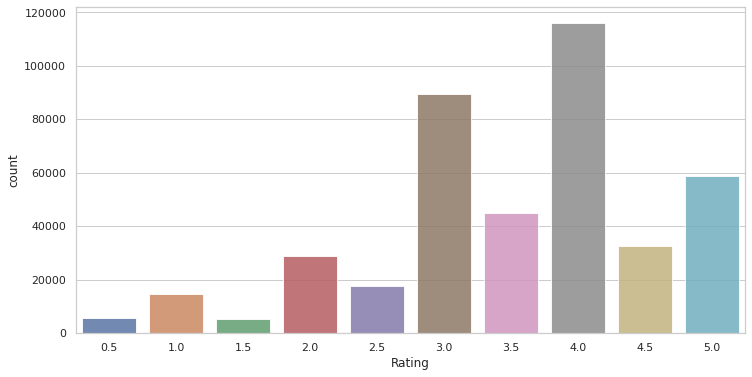

In [12]:
# Histogram
plt.figure(figsize=(12,6))
sns.countplot('rating', data=rating, alpha=0.85)
plt.xlabel('Rating', size=12)
plt.show()

In [13]:
# Quantidade de avaliacao de usuario
rating['userId'].value_counts()

2261    2644
903     2608
741     2212
982     2183
156     2179
        ... 
287       20
2102      20
922       20
1962      20
52        20
Name: userId, Length: 2823, dtype: int64

In [16]:
# Filmes que tenham mais de 30000 avaliacoes
x=rating['userId'].value_counts()>100
x

2261     True
903      True
741      True
982      True
156      True
        ...  
287     False
2102    False
922     False
1962    False
52      False
Name: userId, Length: 2823, dtype: bool

In [17]:
# Quantidade de usuario que avaliaram
y=x[x].index
print(y.shape)

(1071,)


# Regra de negocio da empresa

In [30]:
# Decisão do negocio - trazendo so usuario que avaliaram
rating=rating[rating['userId'].isin(y)]

In [31]:
# Juntar as tabelas
rating_filme=rating.merge(movie,on='movieId')
rating_filme.head()

,userId,movieId,rating,titulo,genero
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
2,54,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
3,88,2,1.0,Jumanji (1995),Adventure|Children|Fantasy
4,91,2,3.5,Jumanji (1995),Adventure|Children|Fantasy


In [32]:
# Qte de avaliacao por filme
num_rating=rating_filme.groupby('titulo')['rating'].count().reset_index()
num_rating

,titulo,rating
0,'Hellboy': The Seeds of Creation (2004),3
1,'Round Midnight (1986),2
2,'Salem's Lot (2004),2
3,'Til There Was You (1997),13
4,"'burbs, The (1989)",56
...,...,...
11592,loudQUIETloud: A Film About the Pixies (2006),1
11593,xXx (2002),80
11594,xXx: State of the Union (2005),10
11595,¡Three Amigos! (1986),107


In [39]:
num_rating['rating']>30000

0        False
1        False
2        False
3        False
4        False
         ...  
11592    False
11593    False
11594    False
11595    False
11596    False
Name: rating, Length: 11597, dtype: bool

In [42]:
num_rating[num_rating['rating']>30000]

,titulo,rating


In [88]:
num_rating[num_rating['titulo']=='20,000 Leagues Under the Sea (1954)']

,titulo,num_aval
72,"20,000 Leagues Under the Sea (1954)",89


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


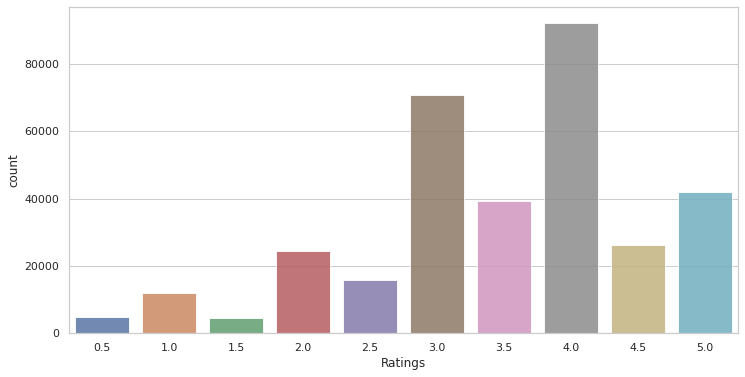

In [43]:
# Histogram
plt.figure(figsize=(12,6))
sns.countplot('rating', data=rating_filme, alpha=0.85)
plt.xlabel('Ratings', size=12)
plt.show()

In [44]:
# Renomear o campo rating
num_rating.rename(columns={'rating':'num_aval'},inplace=True)
num_rating

,titulo,num_aval
0,'Hellboy': The Seeds of Creation (2004),3
1,'Round Midnight (1986),2
2,'Salem's Lot (2004),2
3,'Til There Was You (1997),13
4,"'burbs, The (1989)",56
...,...,...
11592,loudQUIETloud: A Film About the Pixies (2006),1
11593,xXx (2002),80
11594,xXx: State of the Union (2005),10
11595,¡Three Amigos! (1986),107


In [45]:
# Juntar a tabela num_rating e filme_avaliacao
final_rating=rating_filme.merge(num_rating,on='titulo')
final_rating

,userId,movieId,rating,titulo,genero,num_aval
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,335
1,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,335
2,54,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,335
3,88,2,1.0,Jumanji (1995),Adventure|Children|Fantasy,335
4,91,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,335
...,...,...,...,...,...,...
332243,2813,5467,1.5,Never Again (2001),Comedy|Romance,1
332244,2813,74327,4.5,"First Day of the Rest of Your Life, The (Le pr...",Comedy|Drama,1
332245,2813,93892,4.5,Romantics Anonymous (Les émotifs anonymes) (2010),Comedy|Romance,1
332246,2813,101186,5.0,Populaire (2012),Comedy,1


In [46]:
print(f'Numero Total de Avaliação: {len(final_rating)} \nNumero Total de Utilizador: {len(final_rating.userId.unique())} \
\nMedia de Avaliação por Utilizador: {round(len(final_rating)/len(final_rating.userId.unique()),2)}')

Numero Total de Avaliação: 332248 
Numero Total de Utilizador: 1071 
Media de Avaliação por Utilizador: 310.22


In [47]:
# Decisao do negocio - filme que foram avaliado mais de 20000 vezes
#final_rating=final_rating[final_rating['num_aval']>=20000]
#final_rating.shape

In [48]:
final_rating.head()

,userId,movieId,rating,titulo,genero,num_aval
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,335
1,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,335
2,54,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,335
3,88,2,1.0,Jumanji (1995),Adventure|Children|Fantasy,335
4,91,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,335


In [49]:
# Let's see the users that rated more
more = final_rating.groupby('userId').num_aval.count().sort_values(ascending=False)

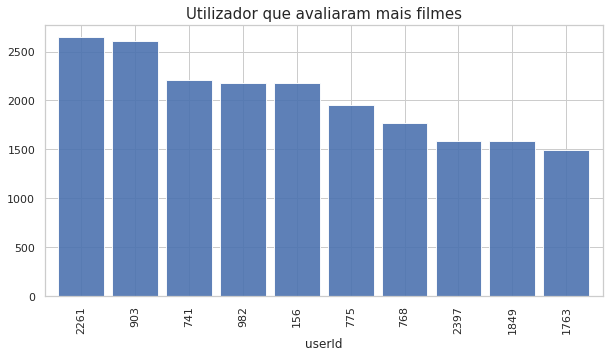

In [50]:
# Plotting the top 10 raters
plt.figure(figsize=(10,5))
more.head(10).plot(kind='bar', alpha=0.9, width=0.85)
plt.title("Utilizador que avaliaram mais filmes", size=15)
plt.show()

In [51]:
# Criando um conjunto de quantis de 0 a 100% com passo de 1%
quantiles = more.quantile(np.arange(0,1.01,0.01), interpolation='higher')

#quantiles Log scale
quantiles_log = np.log(quantiles)

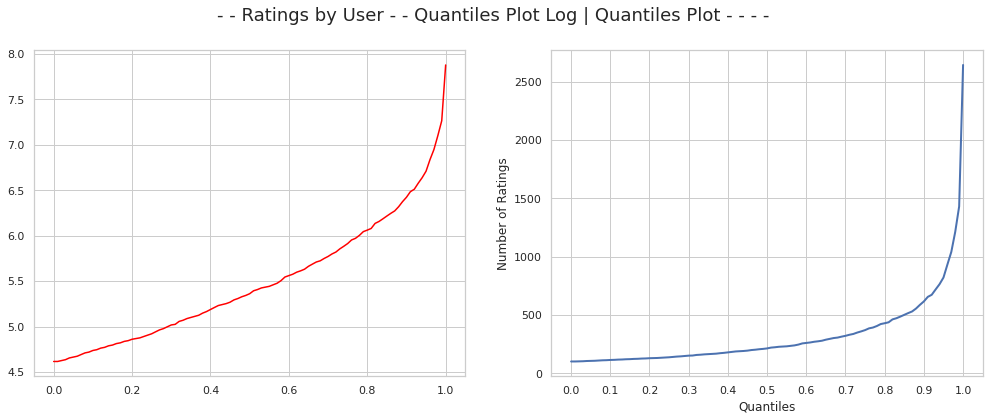

In [52]:
# Plot of the quantiles
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,6))
ax1.plot(quantiles_log, c='red')
ax2.plot(quantiles, linewidth=2)
fig.suptitle('- - Ratings by User - - Quantiles Plot Log | Quantiles Plot - - - -', size=18)
plt.xlabel('Quantiles')
plt.ylabel('Number of Ratings')
plt.xticks(np.arange(0.,1.01, 0.1))
plt.show()

In [53]:
# Quantity of users that rated more than 50 products
print(f'Avaliaram 50 ou mais de 50 filmes: {sum(more>=50)}')

Avaliaram 50 ou mais de 50 filmes: 1071


# Recomendado com base na Popularidade

O sistema de recomendação mais simples a ser construído é aquele baseado na popularidade, ou por outras palavras, apenas calculará as quantidades de revisões e a média de cada item e calculará uma classificação com base nisso. O problema é que não lhe permite qualquer tipo de personalização.

In [54]:
# Recomendador baseado em popularidade
# Dataframe with products that have more than 50 rates
new_df=final_rating.groupby("movieId").filter(lambda x:x['num_aval'].count() >=50)

In [55]:
new_df.head(10)

,userId,movieId,rating,titulo,genero,num_aval
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,335
1,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,335
2,54,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,335
3,88,2,1.0,Jumanji (1995),Adventure|Children|Fantasy,335
4,91,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,335
5,116,2,2.0,Jumanji (1995),Adventure|Children|Fantasy,335
6,124,2,2.0,Jumanji (1995),Adventure|Children|Fantasy,335
7,129,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,335
8,131,2,1.0,Jumanji (1995),Adventure|Children|Fantasy,335
9,132,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,335


In [56]:
# Criando um novo DataFrame com classificação média e número de classificações por produto
rating_df = pd.DataFrame(new_df.groupby('movieId').rating.mean())

In [57]:
# Adicionando coluna com número de avaliações por produto
rating_df['rating_counts'] = new_df.groupby('movieId').rating.count()

In [58]:
# Visualizing the 5 top rated products (number of ratings)
rating_df.sort_values(by='rating_counts', ascending=False).head(5)

,rating,rating_counts
movieId,,
356,3.966113,782
296,4.209211,760
593,4.139646,734
480,3.582305,729
2571,4.126751,714


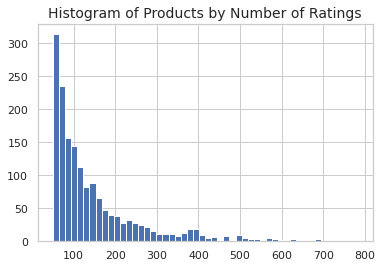

In [59]:
# Plot Histogram of the counts
rating_df.rating_counts.hist(bins=50)
plt.title('Histogram of Products by Number of Ratings', size=14)
plt.show()

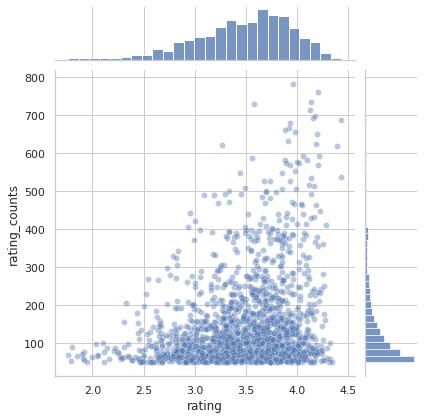

In [60]:
# Gráfico de dispersão das classificações vs. contagens
sns.jointplot(x='rating', y='rating_counts', data=rating_df, alpha=0.4)
plt.show()

In [61]:
# The global average of the ratings
C = rating_df['rating'].mean()
print(round(C,2))

3.48


In [62]:
# Use the minimum number of votes required to be in the popularity recommender
m = rating_df.rating_counts.min(); 
m

50

Definir uma função para calcular uma média ponderada que toma o número total de votos e o limiar (50) e multiplicá-lo pela média global e pela média do produto. A fórmula é: (v/(v+m) * R) + (m/(m+v) * C)

*   v é o número de votos para o produto;
*  m é o número mínimo de votos exigido para ser listado no gráfico;
*   R é a classificação média do produto;
*   C é o voto médio em todo o relatório

In [63]:
# Função que calcula a classificação ponderada de cada filme
def weighted_rating(x, m=m, C=C):
    v = x['rating_counts']
    R = x['rating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [64]:
# Adicione o 'score' calculado com weighted_rating() ao dataframe
rating_df['score'] = rating_df.apply(weighted_rating, axis=1)

Resultado final com os 15 produtos mais **populares** texto em negrito

In [65]:
# Resultado final com os 15 produtos mais populares
rating_df.sort_values(by='score', ascending=False).head(10)

,rating,rating_counts,score
movieId,,,
318,4.433042,687,4.368122
858,4.430297,538,4.349160
50,4.391129,620,4.322845
1221,4.287805,410,4.199578
296,4.209211,760,4.163958
912,4.254848,361,4.160112
527,4.215008,593,4.157552
1193,4.229399,449,4.153920
1198,4.197692,650,4.146151


# Sistema de filtragem  baseado em colaborativa

In [66]:
# Model-based collaborative filtering system
new_df.head(3)

,userId,movieId,rating,titulo,genero,num_aval
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,335
1,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,335
2,54,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,335


In [67]:
# pivot table : transpor a linha em coluna
filme_pivot=new_df.pivot_table(columns='userId',index='titulo',values='rating')

In [ ]:
filme_pivot

userId,1,3,7,11,14,18,21,22,23,24,...,10430,10433,10434,10435,10436,10437,10443,10446,10447,10448
titulo,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5
*batteries not included (1987),NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...And Justice for All (1979),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 (1979),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zulu (1964),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[REC] (2007),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


In [68]:
filme_pivot.fillna(0,inplace=True)

In [69]:
filme_pivot

userId,1,3,7,11,14,18,21,22,23,24,...,2803,2804,2808,2809,2810,2812,2813,2816,2822,2823
titulo,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,0.0,5.0,0.0,0.0,4.5,0.0,0.0,0.0
10 Things I Hate About You (1999),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zombieland (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoolander (2001),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
eXistenZ (1999),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0


# Utilizando o algoritmo KNN - distancia euclidiana

In [70]:
# Transformar em amtriz esparsa
from scipy.sparse import csr_matrix

In [71]:
filme_sparse=csr_matrix(filme_pivot)

In [72]:
filme_sparse

<1646x1071 sparse matrix of type '<class 'numpy.float64'>'
	with 245219 stored elements in Compressed Sparse Row format>

In [73]:
from sklearn.neighbors import NearestNeighbors

model=NearestNeighbors(algorithm='brute')
model.fit(filme_sparse)

NearestNeighbors(algorithm='brute')

In [74]:
filme_pivot

userId,1,3,7,11,14,18,21,22,23,24,...,2803,2804,2808,2809,2810,2812,2813,2816,2822,2823
titulo,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,0.0,5.0,0.0,0.0,4.5,0.0,0.0,0.0
10 Things I Hate About You (1999),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zombieland (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoolander (2001),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
eXistenZ (1999),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0


In [75]:
# Testando o exemplo
distances,sugestions=model.kneighbors(filme_pivot.iloc[0,:].values.reshape(1,-1))

In [76]:
# Fazendo a predicao e sugestao do filme - filme com titulo 2001: A Space Odyssey (1968)
for i in range(len(sugestions)):
    print(filme_pivot.index[sugestions[i]])

Index([''burbs, The (1989)', 'Police Academy 4: Citizens on Patrol (1987)',
       'Karate Kid, Part III, The (1989)',
       'Superman IV: The Quest for Peace (1987)',
       'Honey, I Blew Up the Kid (1992)'],
      dtype='object', name='titulo')


# Testando outro utilizador com codigo 11

In [77]:
# Testando outro exemplo
distances,sugestions=model.kneighbors(filme_pivot.iloc[11,:].values.reshape(1,-1))

In [78]:
# Fazendo a predicao e sugestao do filme - filme com titulo 2001: A Space Odyssey (1968)
for i in range(len(sugestions)):
    print(filme_pivot.index[sugestions[i]])

Index(['20,000 Leagues Under the Sea (1954)', 'Blob, The (1958)',
       'Forbidden Planet (1956)', 'Swiss Family Robinson (1960)',
       'Escape from the Planet of the Apes (1971)'],
      dtype='object', name='titulo')


# Recomendar filme no novo utilizador

In [79]:
filme_pivot[11]

titulo
'burbs, The (1989)                                        0.0
(500) Days of Summer (2009)                               0.0
10 Things I Hate About You (1999)                         5.0
101 Dalmatians (1996)                                     3.5
101 Dalmatians (One Hundred and One Dalmatians) (1961)    0.0
                                                         ... 
Zombieland (2009)                                         0.0
Zoolander (2001)                                          0.0
eXistenZ (1999)                                           5.0
xXx (2002)                                                0.0
¡Three Amigos! (1986)                                     0.0
Name: 11, Length: 1646, dtype: float64

In [80]:
filme_pivot[[11]]

userId,11
titulo,
"'burbs, The (1989)",0.0
(500) Days of Summer (2009),0.0
10 Things I Hate About You (1999),5.0
101 Dalmatians (1996),3.5
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.0
...,...
Zombieland (2009),0.0
Zoolander (2001),0.0
eXistenZ (1999),5.0


In [81]:
# Transformar o utilizador 11 em novo utilizador limpando todos registos de avaliação
filme_pivot[[11]]=0

In [82]:
# verificando as informações do novo utilizador
filme_pivot[[11]]

userId,11
titulo,
"'burbs, The (1989)",0
(500) Days of Summer (2009),0
10 Things I Hate About You (1999),0
101 Dalmatians (1996),0
101 Dalmatians (One Hundred and One Dalmatians) (1961),0
...,...
Zombieland (2009),0
Zoolander (2001),0
eXistenZ (1999),0


In [85]:
filme_pivot.head(5)

userId,1,3,7,11,14,18,21,22,23,24,...,2803,2804,2808,2809,2810,2812,2813,2816,2822,2823
titulo,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,0.0,5.0,0.0,0.0,4.5,0.0,0.0,0.0
10 Things I Hate About You (1999),0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.0,0.0,0.0,0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
# Testando o exemplo
distances,sugestions=model.kneighbors(filme_pivot.iloc[11,:].values.reshape(1,-1))

In [87]:
# Fazendo a predicao e sugestao ao novo utilizador
for i in range(len(sugestions)):
    print(filme_pivot.index[sugestions[i]])

Index(['20,000 Leagues Under the Sea (1954)', 'Blob, The (1958)',
       'Forbidden Planet (1956)', 'Swiss Family Robinson (1960)',
       'Escape from the Planet of the Apes (1971)'],
      dtype='object', name='titulo')


# Outra forma a tentar mais
# Decompondo a Matriz.
A função SVD truncada irá de facto reduzir a dimensão da matriz esparsa no número de componentes solicitados

In [90]:
SVD_model = TruncatedSVD(n_components=10)
decomposed_matrix = SVD_model.fit_transform(filme_pivot)
decomposed_matrix.shape

In [ ]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(3810, 3810)

In [ ]:
correlation_matrix

array([[1.        , 0.26917355, 0.80363014, ..., 0.47230796, 0.58716496,
        0.97875285],
       [0.26917355, 1.        , 0.50554782, ..., 0.2683122 , 0.38926309,
        0.26928927],
       [0.80363014, 0.50554782, 1.        , ..., 0.59468734, 0.85071778,
        0.79006969],
       ...,
       [0.47230796, 0.2683122 , 0.59468734, ..., 1.        , 0.68854285,
        0.47013104],
       [0.58716496, 0.38926309, 0.85071778, ..., 0.68854285, 1.        ,
        0.58113714],
       [0.97875285, 0.26928927, 0.79006969, ..., 0.47013104, 0.58113714,
        1.        ]])

In [ ]:
i = "'burbs, The (1989)"

product_names = list(filme_pivot.index)
product_ID = product_names.index(i)
product_ID

0

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(3810,)

In [ ]:
Recommend = list(filme_pivot.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:10]

['*batteries not included (1987)',
 '...And Justice for All (1979)',
 '10 (1979)',
 '10 Things I Hate About You (1999)',
 '101 Dalmatians (1996)',
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 '13th Warrior, The (1999)',
 '1984 (Nineteen Eighty-Four) (1984)',
 '2 Days in the Valley (1996)',
 '20 Dates (1998)']